In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\91805\OneDrive\Desktop\Iris.csv",encoding='latin-1')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preview of Data
There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
There are no null values, so we don't have to worry about that.
There are 50 observations of each species (setosa, versicolor, virginica).

In [4]:
 df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization
After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

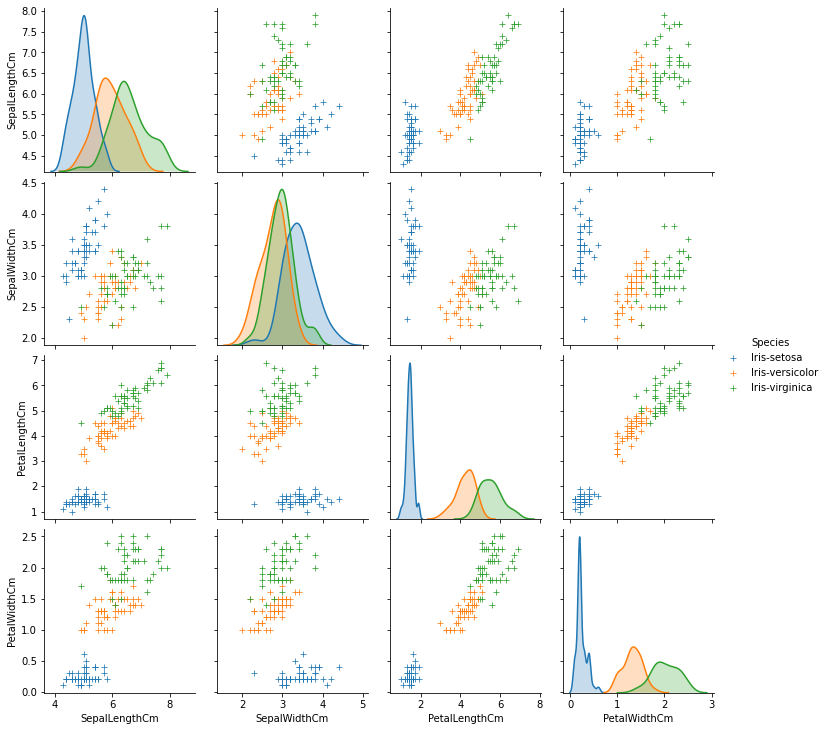

In [8]:
tmp=df.drop('Id',axis=1)
g=sns.pairplot(tmp,hue='Species',markers='+')
plt.show()

In [16]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [19]:
df['Species_class']=np.where(df.Species=='Iris-virginica',1,np.where(df.Species=='Iris-versicolor',2,3))


## Model Preparation

In [29]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( df[cols],
                                                  df['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

## Model Building


In [30]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [31]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\91805\anaconda3\lib\site-packages (1.1.1)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import sklearn
import numpy
import scipy
import joblib
print(sklearn.__version__)    
print(numpy.__version__)     
print(scipy.__version__)     
print(joblib.__version__)     

1.1.1
1.18.5
1.5.0
1.1.0


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.498\nsamples = 83\nvalue = [39, 44, 0]'),
 Text(0.25, 0.375, 'X[2] <= 5.35\ngini = 0.156\nsamples = 47\nvalue = [4, 43, 0]'),
 Text(0.125, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [2, 43, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [35, 1, 0]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]')]

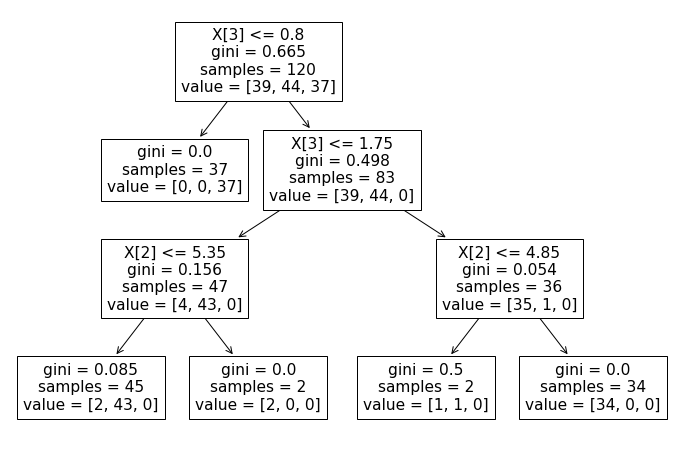

In [45]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(train_X,train_y))

In [46]:
y_pred_gini = clf_gini.predict(test_X)

In [47]:
y_pred_train_gini=clf_gini.predict(train_X)

y_pred_train_gini

array([1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3,
       3, 2, 2, 2, 2, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 1, 3, 2, 2, 1, 3,
       1, 2, 2, 3, 1, 1, 3, 3, 2, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 3, 3, 2,
       3, 3, 2, 1, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3,
       3, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 1,
       2, 2, 1, 2, 2, 3, 2, 2, 1, 1])

In [48]:
print('Model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(test_y,y_pred_gini)))

print('Training-set accuracy score:{0;0.4f}',format(accuracy_score(train_y,y_pred_train_gini)))

Model accuracy score with criterion gini index:0.9667
Training-set accuracy score:{0;0.4f} 0.975


In [50]:
clf_en= DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

clf_en.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 0.997\nsamples = 83\nvalue = [39, 44, 0]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [4, 43, 0]'),
 Text(0.125, 0.125, 'entropy = 0.162\nsamples = 42\nvalue = [1, 41, 0]'),
 Text(0.375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [35, 1, 0]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]')]

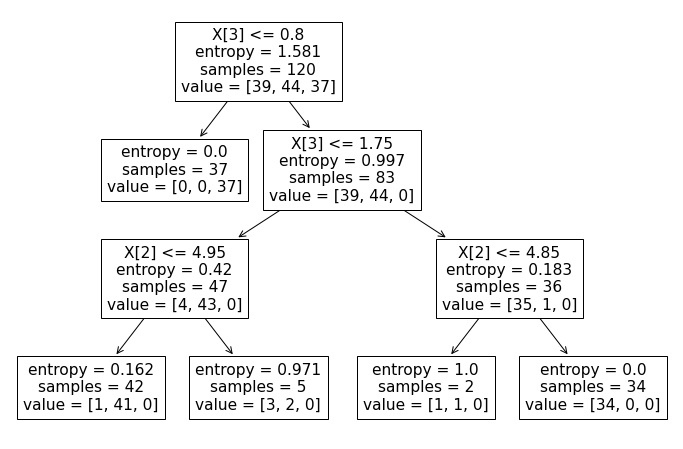

In [51]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(train_X,train_y))

In [52]:
y_pred_en=clf_en.predict(test_X)

In [53]:
y_pred_train_en=clf_en.predict(train_X)

In [54]:
print('Model accuracy score with criterion entropy:{0:0.4f}'.format(accuracy_score(test_y,y_pred_en)))

print('Training-set sccuracy score:{0:0.4f}'.format(accuracy_score(train_y,y_pred_train_en)))

Model accuracy score with criterion entropy:1.0000
Training-set sccuracy score:0.9667


In [55]:
print('Training set score: {:.4f}'.format(clf_en.score(train_X, train_y)))
print('Test set score: {:.4f}'.format(clf_en.score(test_X, test_y)))

Training set score: 0.9667
Test set score: 1.0000


In [57]:
print("Accuracy is",accuracy_score(test_y,y_pred_en)*100)

Accuracy is 100.0
